In [3]:
import pandas as pd
import requests
import numpy as np
import re
import csv
from bs4 import BeautifulSoup
from sklearn.metrics import roc_curve, auc, precision_recall_curve
data_cine1 = pd.read_csv('data_cine/imdb_1.csv')
data_cine2 = pd.read_csv('data_cine/imdb_2.csv')

In [110]:
data_cine1

,Unnamed: 0,movie_id,title,runtime,genre,certificate,imdb_rating,gross,year,votes,director,actors,metascore,summary
0,0,tt7286456,Joker,122.0,"Crime, Drama, Thriller",R,8.5,335.45,(2019),804730,Todd Phillips,"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...",59.0,"In Gotham City, mentally troubled comedian Art..."
1,1,tt6751668,Parasite,132.0,"Comedy, Drama, Thriller",R,8.6,53.37,(2019),423230,Bong Joon Ho,"['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...",96.0,Greed and class discrimination threaten the ne...
2,2,tt8579674,1917,119.0,"Drama, War",R,8.3,159.23,(2019),324071,Sam Mendes,"['Dean-Charles Chapman', 'George MacKay', 'Dan...",78.0,"April 6th, 1917. As a regiment assembles to wa..."
3,3,tt4154796,Avengers: Endgame,181.0,"Action, Adventure, Drama",PG-13,8.4,858.37,(2019),726032,Anthony Russo,"['Joe Russo', 'Robert Downey Jr.', 'Chris Evan...",78.0,After the devastating events of Avengers: Infi...
4,4,tt0068646,The Godfather,175.0,"Crime, Drama",R,9.2,134.97,(1972),1551490,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",100.0,The aging patriarch of an organized crime dyna...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,tt0082083,Blood Beach,92.0,"Comedy, Horror, Sci-Fi",R,4.5,NaN,(1980),2159,Jeffrey Bloom,"['David Huffman', 'Marianna Hill', 'Burt Young...",NaN,Something or someone is attacking people one b...
2996,2996,tt0129136,Hell's Kitchen,95.0,"Crime, Drama",R,4.7,0.01,(1998),2395,Tony Cinciripini,"['Rosanna Arquette', 'William Forsythe', 'Ange...",NaN,"3 men rob a place. Hayden's killed, Johnny's w..."
2997,2997,tt0929618,The Penthouse,89.0,Comedy,R,3.6,NaN,(2010),1376,Chris Levitus,"['Rider Strong', 'Corey Large', 'April Scott',...",NaN,Three lifelong friends inhabiting a penthouse ...
2998,2998,tt5108476,Befikre,130.0,"Comedy, Drama, Romance",Not Rated,3.9,NaN,(2016),6710,Aditya Chopra,"['Ranveer Singh', 'Vaani Kapoor', 'Akarsh Khur...",NaN,"Set in Paris, Befikre is the free-spirited, co..."


In [111]:
data_cine2

,Unnamed: 0,movie_id,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,meta_score
0,0,tt7286456,"10,188 user",682 critic,"['Todd Phillips', 'Scott Silver']",English,"['USA', 'Canada']",$55000000,$335451311,$96202337,['2'],NaN,92.0,199.0,59.0
1,1,tt6751668,"2,507 user",515 critic,"['Bong Joon Ho', 'Bong Joon Ho']",Korean,['South Korea'],$11400000,$53369749,$393216,['4'],NaN,262.0,227.0,96.0
2,2,tt8579674,"2,674 user",461 critic,"['Sam Mendes', 'Krysty Wilson-Cairns']",English,"['USA', 'UK', 'India', 'Spain', 'Canada']",$95000000,$159227644,$576216,['3'],NaN,110.0,161.0,78.0
3,3,tt4154796,"8,764 user",550 critic,"['Christopher Markus', 'Stephen McFeely']",English,['USA'],$356000000,$858373000,$357115007,NaN,['1'],65.0,103.0,78.0
4,4,tt1454029,551 user,393 critic,"['Tate Taylor', 'Kathryn Stockett']",English,['USA'],$25000000,$169708112,$26044590,['1'],NaN,79.0,120.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,tt2441982,10 user,14 critic,"['Christian Clavier', 'Christian Clavier']",French,"['France', 'Belgium', 'Czech Republic']",EUR25000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2996,tt6131712,18 user,43 critic,"['David Firth', 'Flying Lotus']",English,['USA'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
2997,2997,tt1107816,55 user,100 critic,"['Jim Agnew', 'Sean Keller']",English,['Italy'],$14000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2998,2998,tt0242508,69 user,28 critic,['James Toback'],English,['USA'],$5500000,$56653,$8425,NaN,NaN,NaN,NaN,49.0


In [112]:
#Eliminar las primeras columnas de cada conjunto de datos
data_cine1.drop(data_cine1.columns[0], axis=1, inplace=True)
data_cine2.drop(data_cine2.columns[0], axis=1, inplace=True)

# combinando los dos marcos de datos en movie_id
datos_cine = data_cine1.merge(data_cine2, on = 'movie_id')

# eliminar columnas redundantes
datos_cine.drop(columns=['gross', 'metascore'], inplace=True)

datos_cine = datos_cine.replace('N/A',np.nan)

datos_cine.rename(columns={'gross_1':'gross'}, inplace=True)
# Eliminando duplicados
datos_cine.drop_duplicates(inplace = True)

In [113]:
# print(datos_cine.isnull().sum())

info_faltante = datos_cine.isnull().sum()
tipos_de_datos = datos_cine.dtypes
info_combinada = pd.DataFrame({'Valores Nulos': info_faltante, 'Tipo de Dato': tipos_de_datos})

# Imprimir la información combinada
print(info_combinada)


               Valores Nulos Tipo de Dato
movie_id                   0       object
title                      0       object
runtime                    4      float64
genre                      0       object
certificate              494       object
imdb_rating                0      float64
year                       0       object
votes                      0        int64
director                   0       object
actors                     0       object
summary                    0       object
user_review                1       object
critic_review            102       object
writer                     4       object
language                  29       object
country                    1       object
budget                  1483       object
gross                   1629       object
opening_week            1747       object
oscar_win               2608       object
oscar_nom               2611       object
other_win               1317      float64
other_nom               1184      

In [114]:
datos_cine

,movie_id,title,runtime,genre,certificate,imdb_rating,year,votes,director,actors,...,language,country,budget,gross,opening_week,oscar_win,oscar_nom,other_win,other_nom,meta_score
0,tt7286456,Joker,122.0,"Crime, Drama, Thriller",R,8.5,(2019),804730,Todd Phillips,"['Joaquin Phoenix', 'Robert De Niro', 'Zazie B...",...,English,"['USA', 'Canada']",$55000000,$335451311,$96202337,['2'],NaN,92.0,199.0,59.0
1,tt6751668,Parasite,132.0,"Comedy, Drama, Thriller",R,8.6,(2019),423230,Bong Joon Ho,"['Kang-ho Song', 'Sun-kyun Lee', 'Yeo-jeong Jo...",...,Korean,['South Korea'],$11400000,$53369749,$393216,['4'],NaN,262.0,227.0,96.0
2,tt8579674,1917,119.0,"Drama, War",R,8.3,(2019),324071,Sam Mendes,"['Dean-Charles Chapman', 'George MacKay', 'Dan...",...,English,"['USA', 'UK', 'India', 'Spain', 'Canada']",$95000000,$159227644,$576216,['3'],NaN,110.0,161.0,78.0
3,tt4154796,Avengers: Endgame,181.0,"Action, Adventure, Drama",PG-13,8.4,(2019),726032,Anthony Russo,"['Joe Russo', 'Robert Downey Jr.', 'Chris Evan...",...,English,['USA'],$356000000,$858373000,$357115007,NaN,['1'],65.0,103.0,78.0
4,tt0068646,The Godfather,175.0,"Crime, Drama",R,9.2,(1972),1551490,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",...,English,['USA'],$6000000,$134966411,$302393,['3'],NaN,26.0,30.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,tt2622826,Avalanche Sharks,82.0,"Action, Adventure, Comedy",Not Rated,2.3,(2014),1924,Scott Wheeler,"['Alexander Mendeluk', 'Kate Nauta', 'Benjamin...",...,English,['Canada'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830,tt1107816,Giallo,92.0,"Crime, Drama, Horror",R,4.4,(2009),5088,Dario Argento,"['Adrien Brody', 'Emmanuelle Seigner', 'Elsa P...",...,English,['Italy'],$14000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2831,tt4961380,House on Willow Street,90.0,"Action, Crime, Horror",Unrated,4.8,(2016),6593,Alastair Orr,"['Sharni Vinson', 'Carlyn Burchell', 'Steven J...",...,English,['South Africa'],NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN
2832,tt0082083,Blood Beach,92.0,"Comedy, Horror, Sci-Fi",R,4.5,(1980),2159,Jeffrey Bloom,"['David Huffman', 'Marianna Hill', 'Burt Young...",...,English,['USA'],$2000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
import pandas as pd

def cleaner(datos_cine, function):
    # Utiliza expresiones regulares para eliminar caracteres no deseados
    datos_cine.loc[:, function] = datos_cine.loc[:, function].replace("[\[\]']", "", regex=True)
    return datos_cine.loc[:, function]

def unique_values(datos_cine, feature):
    unique_feature = set()  # Usar un conjunto para valores únicos
    for i in datos_cine.loc[:, feature]:
        a = i.split(",")
        for b in a:
            unique_feature.add(b.strip())
    return list(unique_feature)

def custom_encoder(datos_cine, feature):
    unique_feature = set()
    for i in datos_cine.loc[:, feature]:
        a = i.split(",")
        for b in a:
            unique_feature.add(b.strip())
    
    cleaned_feature = []
    for i in datos_cine.loc[:, feature]:
        a = i.split(",")
        c = [b.strip() for b in a]
        cleaned_feature.append(c)
    
    # Crea nuevas columnas en el DataFrame para cada valor único y codifica las características
    for i in unique_feature:
        datos_cine[i] = [1 if i in x else 0 for x in cleaned_feature]
    
    # Elimina la columna original después de la codificación
    datos_cine.drop(columns=[feature], inplace=True)
    
    return datos_cine


In [116]:
#Extraer el año de una cadena y convertirlo en un entero.
datos_cine.year = datos_cine.year.apply(lambda x: int(re.findall("\d{4}",x)[0]))

In [117]:
#rellena los valores faltantes (NaN) en la columna "runtime"
datos_cine.runtime.fillna(datos_cine.runtime.mean(), inplace=True)

In [118]:
# obteniendo solo el monto del premio
datos_cine.oscar_win = datos_cine.oscar_win.str.extract(r'(\d+)')
datos_cine.oscar_nom = datos_cine.oscar_nom.str.extract(r'(\d+)')

# falta llenar con 0
datos_cine.oscar_win.fillna(0, inplace=True)
datos_cine.oscar_nom.fillna(0, inplace=True)
datos_cine.other_win.fillna(0, inplace=True)
datos_cine.other_nom.fillna(0, inplace=True)

# convertir a entero
datos_cine.oscar_win = datos_cine.oscar_win.astype(int)
datos_cine.oscar_nom = datos_cine.oscar_nom.astype(int)
datos_cine.other_win = datos_cine.other_win.apply(lambda x: int(x))
datos_cine.other_nom = datos_cine.other_nom.apply(lambda x: int(x))

In [119]:
#poner usa en country de datos nulos
datos_cine.country.fillna('USA', inplace = True)

#deshacerse de bits no deseados en el valor de la cadena
datos_cine.country = cleaner(datos_cine, "country")


In [120]:
datos_cine.shape

(2834, 24)

In [121]:
#Lllenar los valores faltantes (NaN) en la columna "meta_score" con valores existentes en esa columna
datos_cine.meta_score.fillna(datos_cine.meta_score.mean(), inplace=True)

In [122]:
#Llenar lo faltante en lenguaje con English
datos_cine.language.fillna("English", inplace=True)

In [123]:
#rellenar los valores faltantes (NaN) en la columna "user_review" con el valor '0'
datos_cine.user_review.fillna('0', inplace = True)
#limpiar y convertir valores de texto en números enteros en la columna "user_review."
datos_cine.user_review = datos_cine.user_review.apply(lambda x: int(x.replace(",", "").split(" ")[0].strip()))

In [124]:
#Limpiar y rellenar la columna critic_review
datos_cine.critic_review = datos_cine.critic_review.str.extract(r'(\d+)')
datos_cine.critic_review.fillna(0, inplace=True)

In [125]:
#Llenar y editar la columna "budget"
datos_cine.budget = datos_cine.budget.str.extract(r'(\d+)')

datos_cine.budget.fillna('0', inplace = True)

datos_cine.budget = datos_cine.budget.apply(lambda x: int(x))

# reemplazando los 0 con el valor mediano del presupuesto sin incluir los 0
datos_cine.budget = datos_cine.budget.replace(0, datos_cine[datos_cine.budget != 0].budget.median())

In [126]:
#Llenar y editar la columna "gross"
datos_cine.gross = datos_cine.gross.str.extract(r'(\d+)')

datos_cine.gross.fillna('0', inplace = True)

datos_cine.gross = datos_cine.gross.apply(lambda x: int(x))

# reemplazando los 0 con el valor mediano del presupuesto sin incluir los 0
datos_cine.gross = datos_cine.gross.replace(0, datos_cine[datos_cine.gross != 0].gross.median())

In [127]:
#Llenar y editar la columna "opening_week"
datos_cine.opening_week = datos_cine.opening_week.str.extract(r'(\d+)')

datos_cine.opening_week.fillna('0', inplace = True)

datos_cine.opening_week = datos_cine.opening_week.apply(lambda x: int(x))

# reemplazando los 0 con el valor mediano del presupuesto sin incluir los 0
datos_cine.opening_week = datos_cine.opening_week.replace(0, datos_cine[datos_cine.opening_week != 0].opening_week.median())

In [128]:
#Llenar y editar la columna "certificate"
datos_cine.certificate.fillna('Not Rated', inplace = True)
datos_cine.certificate.replace("Not Rated", "Unrated", inplace=True)

In [129]:
#Eliminar director y writer porque hay demaciados valores unicos 
datos_cine.drop("writer", axis=1, inplace=True)
datos_cine.drop("director", axis=1, inplace=True)

In [130]:
datos_cine = datos_cine.drop('actors', axis=1)

In [131]:
#divir los generos en diferentes columnas 
datos_cine = custom_encoder(datos_cine, "genre")
datos_cine.shape

(2834, 44)

In [132]:
# Suponiendo que tu dataframe se llama 'df'
columnas_a_excluir = ['title', 'runtime', 'certificate', 'imdb_rating', 'year', 'votes', 'summary', 'user_review', 'critic_review','language', 'country', 'budget', 'gross', 'opening_week', 'oscar_win', 'oscar_nom', 'other_win', 'other_nom', 'meta_score']

# Utiliza la función drop para eliminar las columnas que quieres excluir
nuevo_df = datos_cine.drop(columnas_a_excluir, axis=1)

# Ahora puedes mostrar el nuevo dataframe
nuevo_df

,movie_id,Fantasy,News,Romance,Thriller,Film-Noir,Comedy,Animation,Biography,Sport,...,Family,Short,Western,History,Horror,Mystery,Crime,Sci-Fi,Music,Documentary
0,tt7286456,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,tt6751668,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt8579674,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt4154796,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0068646,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,tt2622826,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2830,tt1107816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2831,tt4961380,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2832,tt0082083,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [133]:
print(datos_cine.dtypes)

movie_id          object
title             object
runtime          float64
certificate       object
imdb_rating      float64
year               int64
votes              int64
summary           object
user_review        int64
critic_review     object
language          object
country           object
budget             int64
gross              int64
opening_week       int64
oscar_win          int32
oscar_nom          int32
other_win          int64
other_nom          int64
meta_score       float64
Fantasy            int64
News               int64
Romance            int64
Thriller           int64
Film-Noir          int64
Comedy             int64
Animation          int64
Biography          int64
Sport              int64
Adventure          int64
War                int64
Drama              int64
Musical            int64
Action             int64
Family             int64
Short              int64
Western            int64
History            int64
Horror             int64
Mystery            int64


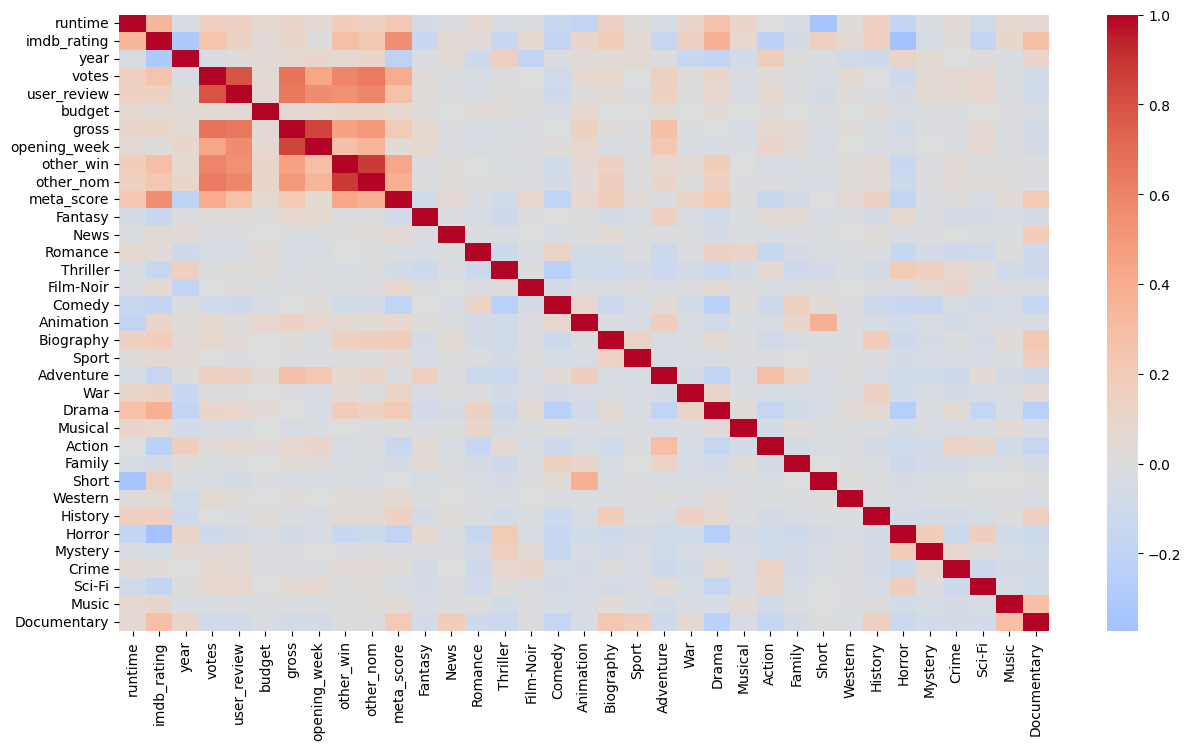

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas numéricas del DataFrame
numeric_columns = datos_cine.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crea el gráfico de calor con el mapa de colores cambiado
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(correlation_matrix, center=0, cmap='coolwarm');
plt.show()

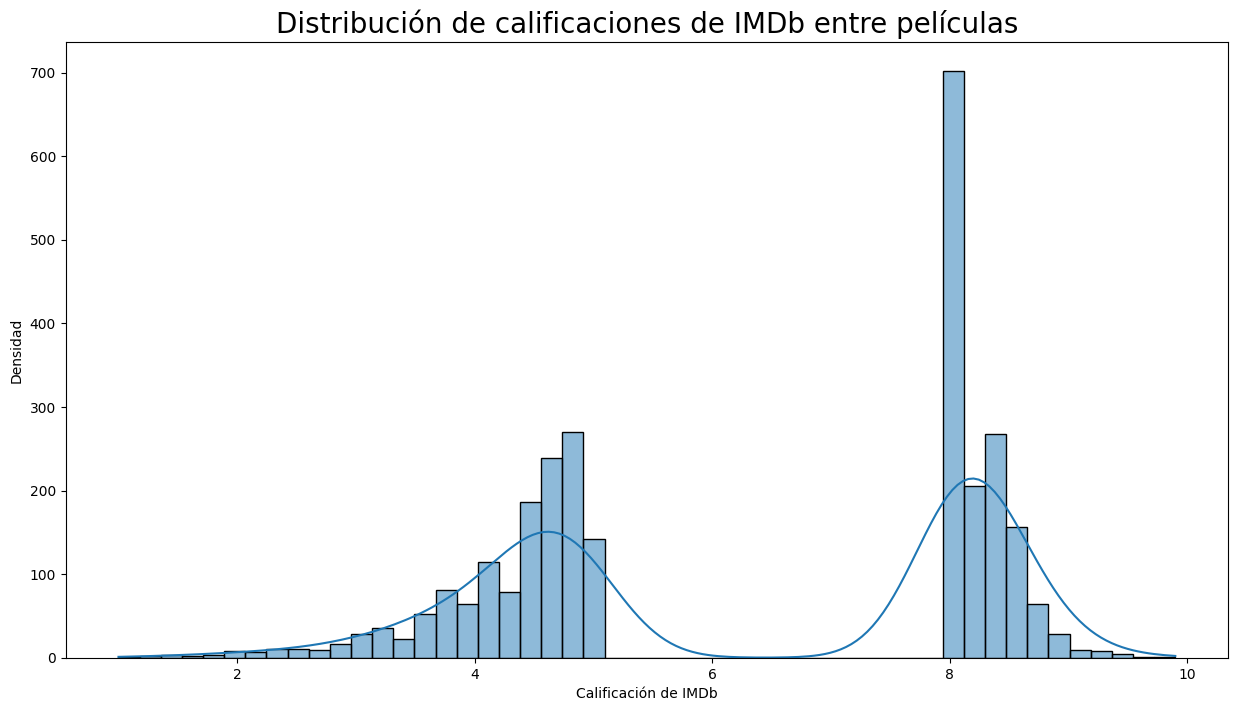

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(datos_cine['imdb_rating'], bins=50, kde=True, ax=ax)  # Utiliza histplot en lugar de displot
plt.title("Distribución de calificaciones de IMDb entre películas", size=20)
plt.xlabel("Calificación de IMDb")
plt.ylabel("Densidad")

plt.show()

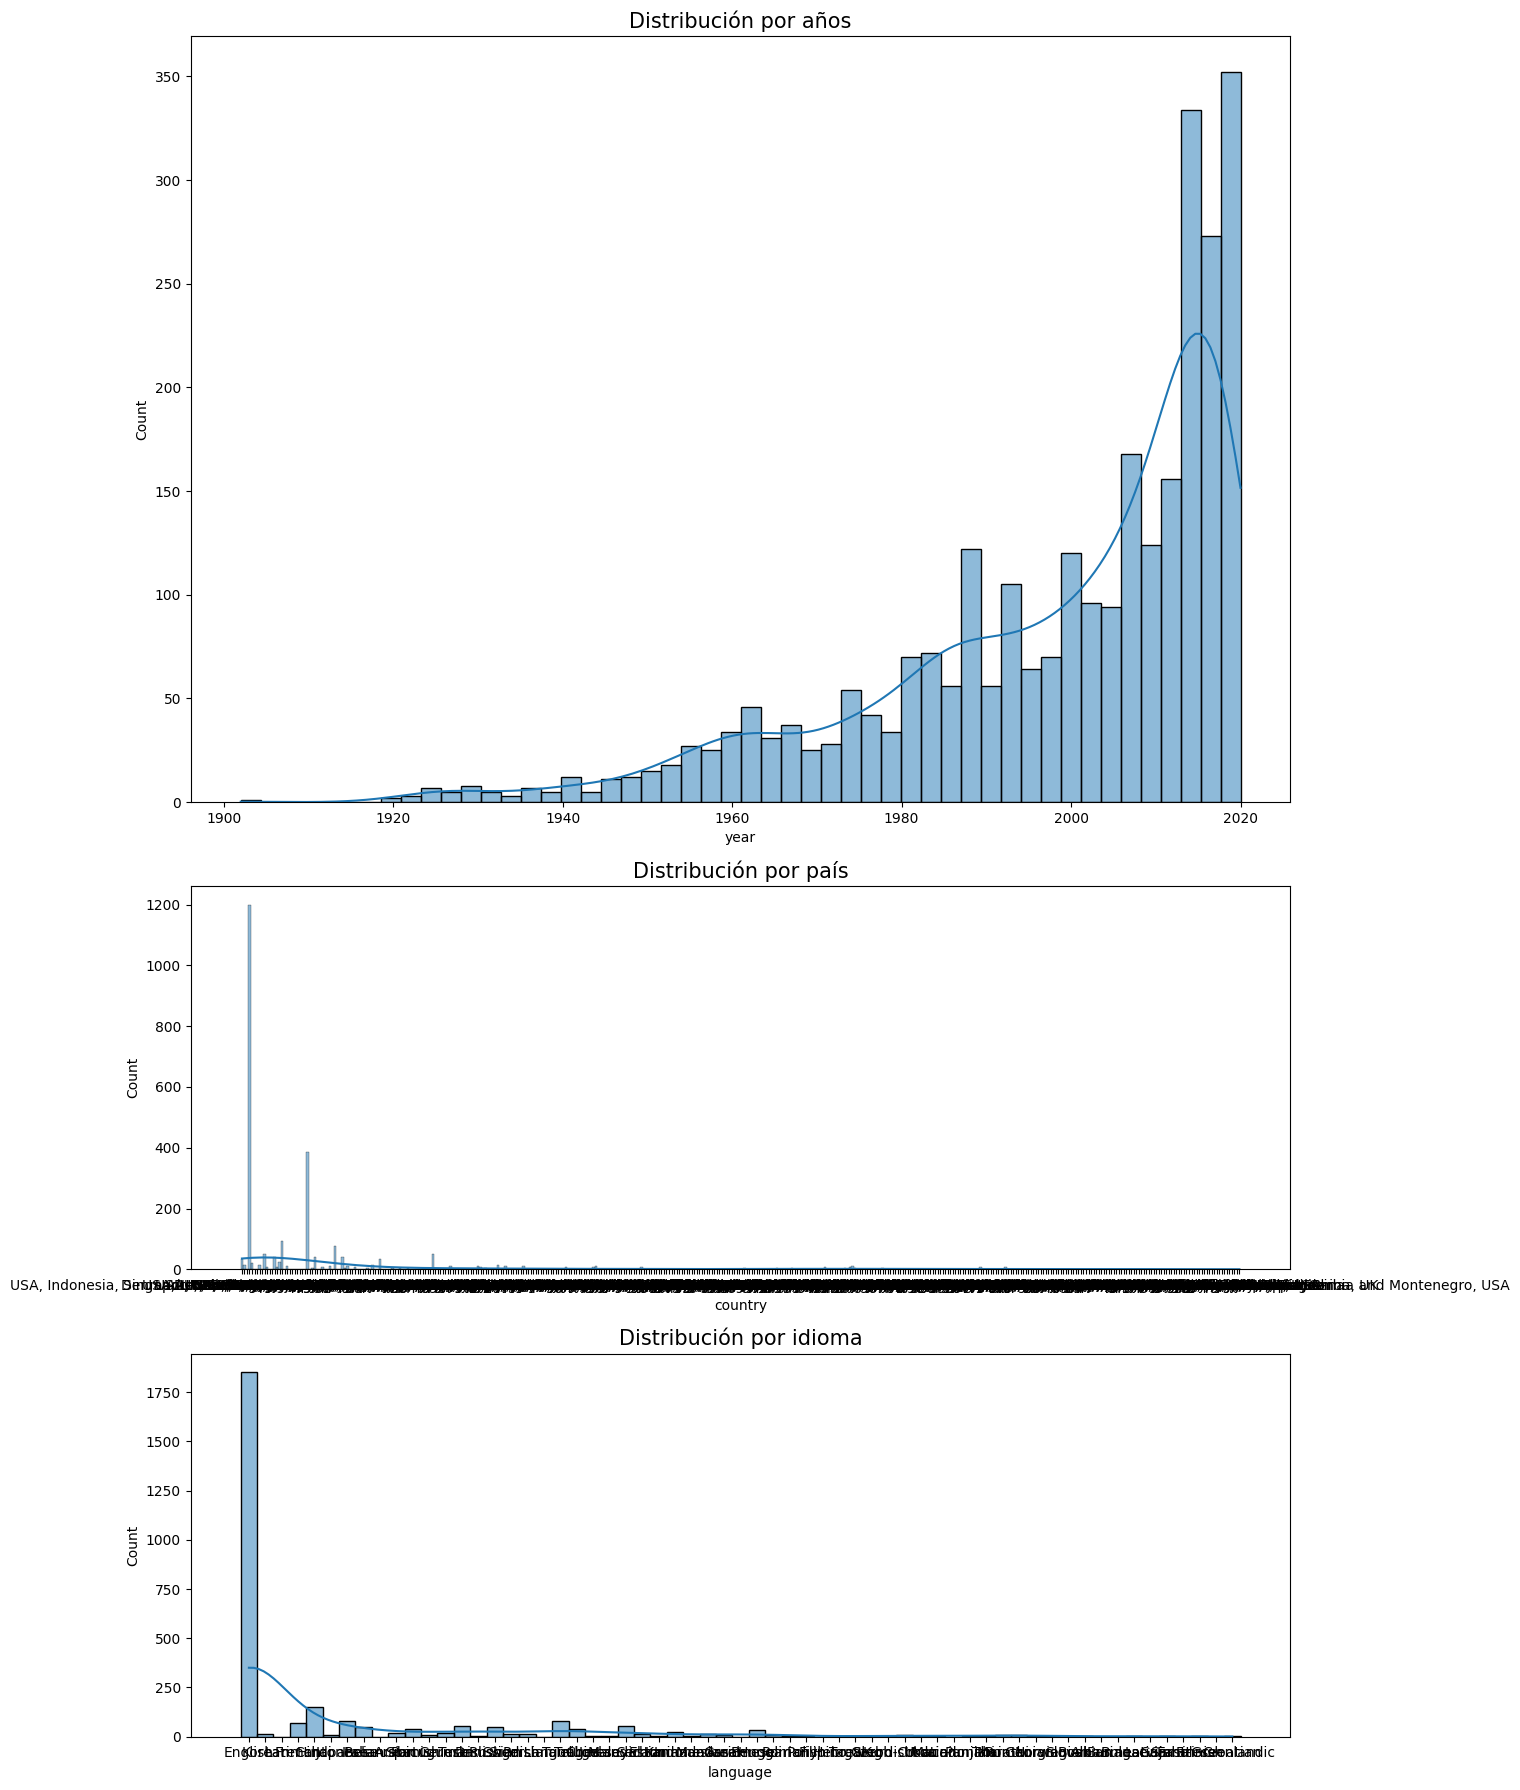

In [147]:
# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 1, figsize=(15, 18), gridspec_kw={'height_ratios': [2, 1, 1]})

# Histograma para 'year'
sns.histplot(datos_cine['year'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución por años', size=15)

# Histograma para 'country'
sns.histplot(datos_cine['country'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribución por país', size=15)

# Histograma para 'language'
sns.histplot(datos_cine['language'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribución por idioma', size=15)

# Ajustes de diseño
plt.tight_layout()
plt.show()

In [28]:
from IPython.display import display, Markdown
display(Markdown('# Feature Engineering'))

# Feature Engineering

In [ ]:
datos_cine = custom_encoder(datos_cine, 'country')

In [ ]:
datos_cine['year'] = datos_cine['year'].astype(str)
datos_cine['label'] = datos_cine.imdb_rating.apply(lambda x : 1 if x > 7.5 else 0)

In [31]:
datos_cine = pd.get_dummies(datos_cine, columns=["language", "certificate", "year"], drop_first=True)

In [6]:
y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating","label", "summary" ],axis = 1)

In [33]:
X.shape

(2834, 314)

In [34]:
from IPython.display import display, Markdown
display(Markdown('## Modelamiento'))

## Modelamiento

In [4]:
nombre_archivo = 'data_cine/datos_procesados_pelicula.csv'
datos_cine = pd.read_csv(nombre_archivo)

y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating","label", "summary" ],axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_7816\1680219395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_cine, x="label", palette=["Red", "Green"], ax=axes[0])


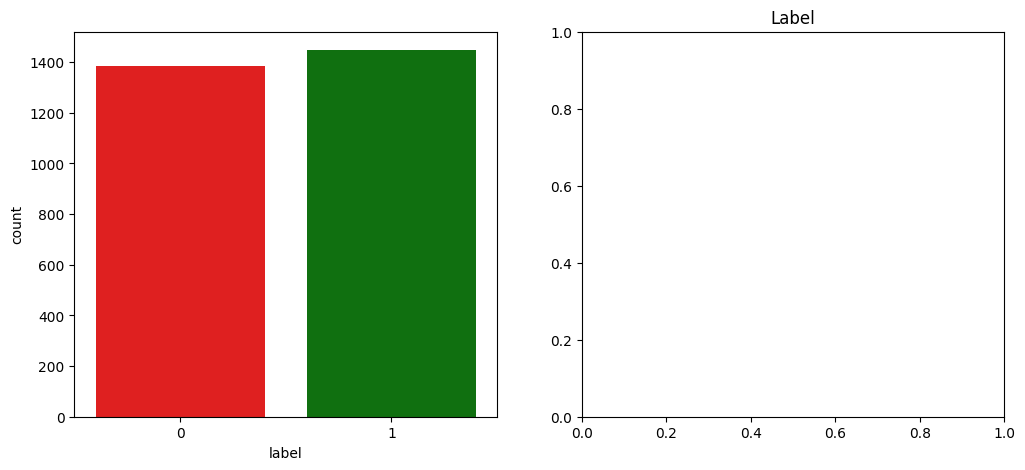

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=datos_cine, x="label", palette=["Red", "Green"], ax=axes[0])
axes[1].set_title('Label')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Supongamos que ya tienes tus datos X e y
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Columnas a escalar
scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross", "opening_week", "meta_score", "other_win", "other_nom"]
# Crear un objeto StandardScaler
scaler = StandardScaler()
# Aplicar la escala a las columnas seleccionadas en el conjunto de entrenamiento
X_train[scale] = scaler.fit_transform(X_train[scale])
# Aplicar la misma escala al conjunto de prueba (usando la media y la desviación estándar aprendidas del conjunto de entrenamiento)
X_test[scale] = scaler.transform(X_test[scale])

In [6]:
from IPython.display import display, Markdown
display(Markdown('# CREACION DEL MODELO'))

# CREACION DEL MODELO

In [7]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
# Diccionario para almacenar resultados de validación cruzada para diferentes profundidades máximas
max_depth_counter = {}
# Probar diferentes valores de profundidad máxima
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]:
    # Crear el clasificador de árboles de decisión con la profundidad máxima actual
    decision_tree = DecisionTreeClassifier(max_depth=i)
    # Calcular el promedio de las puntuaciones de validación cruzada
    cv_mean = cross_val_score(decision_tree, X_train, y_train, cv=cv, n_jobs=-1).mean()
    # Almacenar el promedio de puntuación de validación cruzada y la profundidad máxima en el diccionario
    max_depth_counter[i] = cv_mean
    
    print("Profundidad máxima: {}".format(i))
    print("Puntuación de validación cruzada: {}".format(cv_mean))

Profundidad máxima: 1
Puntuación de validación cruzada: 0.7501176470588236
Profundidad máxima: 2
Puntuación de validación cruzada: 0.8682352941176472
Profundidad máxima: 3
Puntuación de validación cruzada: 0.9040000000000001
Profundidad máxima: 4
Puntuación de validación cruzada: 0.9143529411764707
Profundidad máxima: 5
Puntuación de validación cruzada: 0.9355294117647059
Profundidad máxima: 6
Puntuación de validación cruzada: 0.9378823529411765
Profundidad máxima: 7
Puntuación de validación cruzada: 0.9421176470588236
Profundidad máxima: 8
Puntuación de validación cruzada: 0.9407058823529411
Profundidad máxima: 9
Puntuación de validación cruzada: 0.9364705882352942
Profundidad máxima: 10
Puntuación de validación cruzada: 0.9397647058823531
Profundidad máxima: None
Puntuación de validación cruzada: 0.9416470588235294


In [9]:
grid = {
    'n_estimators': [50, 95, 100, 110],
    'max_features': [1, 2, 3, 4, 5, 6, None],
    'criterion': ['gini', 'entropy'],
    'class_weight': ["balanced", "balanced_subsample", None]
}
decision_tree = DecisionTreeClassifier(
    max_depth=max(max_depth_counter, key = max_depth_counter.get))
random_forest = RandomForestClassifier(decision_tree)
grid_model = GridSearchCV(random_forest, grid, )
grid_model.fit(X_train, y_train)
grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 6,
 'n_estimators': 110}

In [10]:
print (grid_model.best_params_)
print (grid_model.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 6, 'n_estimators': 110}
0.9750588235294118


In [11]:
grid_model

GridSearchCV(estimator=RandomForestClassifier(n_estimators=DecisionTreeClassifier(max_depth=7)),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 95, 100, 110]})

In [12]:
random_forest_model = RandomForestClassifier(max_features = grid_model.best_params_["max_features"],\
                            n_estimators = grid_model.best_params_["n_estimators"],\
                            criterion = grid_model.best_params_["criterion"],\
                            class_weight = grid_model.best_params_["class_weight"])
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=6, n_estimators=110)

In [13]:
y_pred = random_forest_model.predict(X_test)

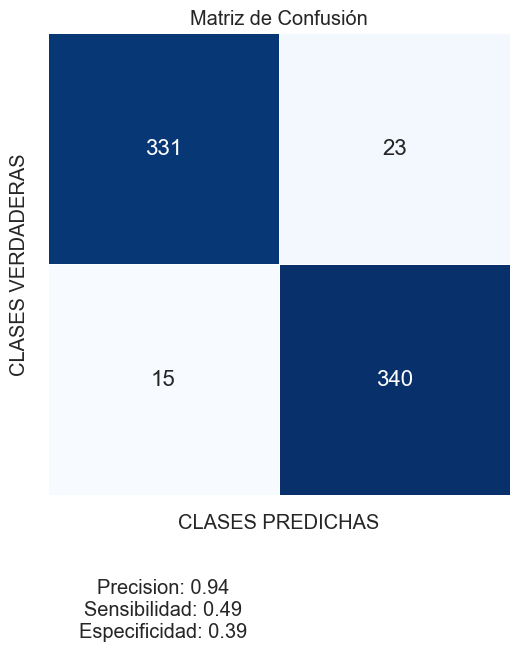

In [14]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Suponiendo que tienes definidos y_test y y_pred

# Calcula la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
vp, fp, vn, fn = matriz_confusion.ravel()

# Calcula la precisión, sensibilidad y especificidad
precision = vp / (vp + fp)
sensibilidad = vp / (vp + fn)
especificidad = vn / (vn + fp)

# Define las etiquetas de las clases
etiquetas_clases = ["", ""]
etiquetas_indices = ["", ""]

# Crea un DataFrame a partir de la matriz de confusión
df_confusion = pd.DataFrame(matriz_confusion, columns=etiquetas_clases, index=etiquetas_indices)

# Grafica la matriz de confusión usando Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente si es necesario
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            linewidths=0.5, annot_kws={"size": 16}, square=True)

# Añade etiquetas y título
plt.xlabel("CLASES PREDICHAS")
plt.ylabel("CLASES VERDADERAS")
plt.title("Matriz de Confusión")

# Muestra información adicional con mayor espacio vertical
plt.text(0.5, 2.5, f'Precision: {precision:.2f}\nSensibilidad: {sensibilidad:.2f}\nEspecificidad: {especificidad:.2f}',
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

# Muestra el gráfico
plt.show()


In [15]:
print (classification_report(y_test, y_pred, labels=random_forest_model.classes_))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       354
           1       0.94      0.96      0.95       355

    accuracy                           0.95       709
   macro avg       0.95      0.95      0.95       709
weighted avg       0.95      0.95      0.95       709



In [16]:
# Printing accuracy Score
print (accuracy_score(y_test, y_pred))

0.9464033850493653


In [ ]:
# Get features Gini scores
feature_importances = pd.DataFrame(random_forest_model.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance'])

feature_importances[feature_importances['importance']!=0].sort_values(by='importance', ascending=False).head(10)

In [51]:
from sklearn.ensemble import RandomForestClassifier
import joblib


joblib.dump(random_forest_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [26]:
random_forest_model

RandomForestClassifier(class_weight='balanced_subsample', max_features=5,
                       n_estimators=110)

Accuracy: 0.95
Confusion Matrix:
 [[392  30]
 [ 13 416]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       422
           1       0.93      0.97      0.95       429

    accuracy                           0.95       851
   macro avg       0.95      0.95      0.95       851
weighted avg       0.95      0.95      0.95       851



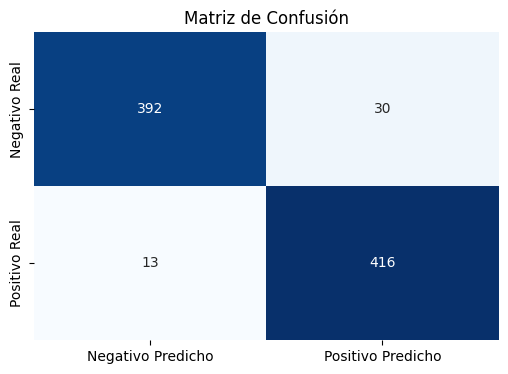

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nombre_archivo = 'data_cine/datos_procesados_pelicula.csv'
datos_cine = pd.read_csv(nombre_archivo)
y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating", "label", "summary"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross", "opening_week", "meta_score", "other_win", "other_nom"]
scaler = StandardScaler()
X_train[scale] = scaler.fit_transform(X_train[scale])

X_test[scale] = scaler.transform(X_test[scale])
modelLogisticRegression = LogisticRegression()

modelLogisticRegression.fit(X_train, y_train)

y_pred = modelLogisticRegression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Imprimir resultados
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)
confusion_df = pd.DataFrame(conf_matrix, index=['Negativo Real', 'Positivo Real'], columns=['Negativo Predicho', 'Positivo Predicho'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()

Accuracy: 0.93
Confusion Matrix:
 [[393  29]
 [ 27 402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       422
           1       0.93      0.94      0.93       429

    accuracy                           0.93       851
   macro avg       0.93      0.93      0.93       851
weighted avg       0.93      0.93      0.93       851



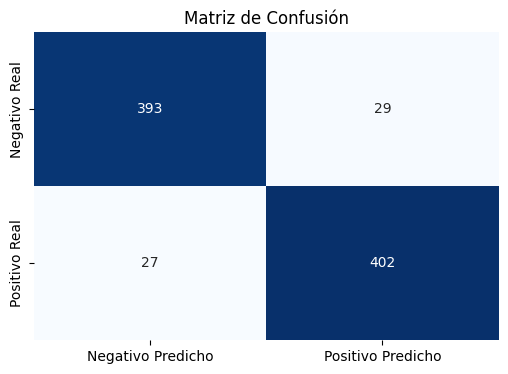

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nombre_archivo = 'data_cine/datos_procesados_pelicula.csv'
datos_cine = pd.read_csv(nombre_archivo)

y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating", "label", "summary"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross", "opening_week", "meta_score", "other_win", "other_nom"]

scaler = StandardScaler()
X_train[scale] = scaler.fit_transform(X_train[scale])
X_test[scale] = scaler.transform(X_test[scale])

modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(X_train, y_train)

y_pred = modelDecisionTree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Imprimir resultados
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)
confusion_df = pd.DataFrame(conf_matrix, index=['Negativo Real', 'Positivo Real'], columns=['Negativo Predicho', 'Positivo Predicho'])
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Accuracy: 0.86
Confusion Matrix:
 [[411  11]
 [112 317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87       422
           1       0.97      0.74      0.84       429

    accuracy                           0.86       851
   macro avg       0.88      0.86      0.85       851
weighted avg       0.88      0.86      0.85       851



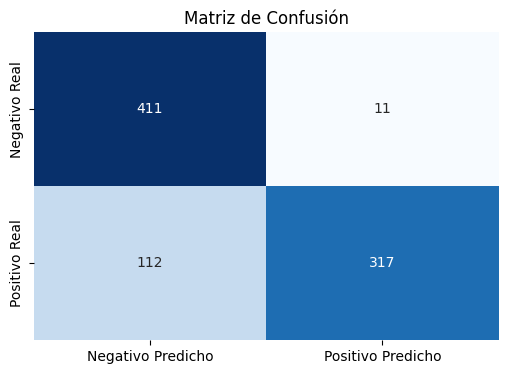

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer los datos desde el archivo
nombre_archivo = 'data_cine/datos_procesados_pelicula.csv'
datos_cine = pd.read_csv(nombre_archivo)

# Separar las características (X) y la variable objetivo (y)
y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating", "label", "summary"], axis=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross", "opening_week", "meta_score", "other_win", "other_nom"]
scaler = StandardScaler()
X_train[scale] = scaler.fit_transform(X_train[scale])
X_test[scale] = scaler.transform(X_test[scale])
modelGaussianNB = GaussianNB()
modelGaussianNB.fit(X_train, y_train)
y_pred = modelGaussianNB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Imprimir resultados
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

confusion_df = pd.DataFrame(conf_matrix, index=['Negativo Real', 'Positivo Real'], columns=['Negativo Predicho', 'Positivo Predicho'])

# Mostrar la matriz de confusión usando seaborn y matplotlib
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


Accuracy: 0.96
Confusion Matrix:
 [[396  26]
 [ 12 417]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       422
           1       0.94      0.97      0.96       429

    accuracy                           0.96       851
   macro avg       0.96      0.96      0.96       851
weighted avg       0.96      0.96      0.96       851



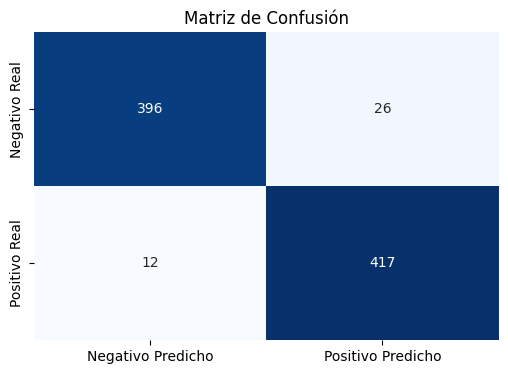

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Leer los datos desde el archivo
nombre_archivo = 'data_cine/datos_procesados_pelicula.csv'
datos_cine = pd.read_csv(nombre_archivo)

# Separar las características (X) y la variable objetivo (y)
y = datos_cine.label
X = datos_cine.drop(["movie_id", "title", "imdb_rating", "label", "summary"], axis=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Columnas a escalar
scale = ["runtime", "votes", "user_review", "critic_review", "budget", "gross", "opening_week", "meta_score", "other_win", "other_nom"]

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la escala a las columnas seleccionadas en el conjunto de entrenamiento
X_train[scale] = scaler.fit_transform(X_train[scale])

# Aplicar la misma escala al conjunto de prueba (usando la media y la desviación estándar aprendidas del conjunto de entrenamiento)
X_test[scale] = scaler.transform(X_test[scale])

# Inicializar el modelo RandomForestClassifier
modelRandomForest = RandomForestClassifier()

# Entrenar el modelo
modelRandomForest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelRandomForest.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# Crear una matriz de confusión como un DataFrame de pandas con etiquetas comunes
confusion_df = pd.DataFrame(conf_matrix, index=['Negativo Real', 'Positivo Real'], columns=['Negativo Predicho', 'Positivo Predicho'])

# Mostrar la matriz de confusión usando seaborn y matplotlib
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


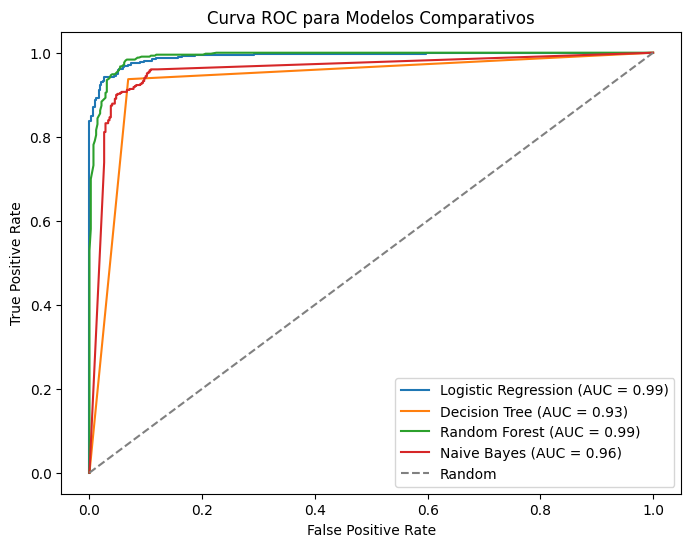

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

linear_models = {
    'Logistic Regression': modelLogisticRegression,
    'Decision Tree': modelDecisionTree,
    'Random Forest': modelRandomForest,
    'Naive Bayes': modelGaussianNB
}
roc_results = {}
plt.figure(figsize=(8, 6))
for model_name, model in linear_models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_results[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Modelos Comparativos')
plt.legend()
plt.show()


In [19]:
# Obtener las importancias de las características para RandomForestClassifier
feature_importances_rf = pd.DataFrame(modelRandomForest.feature_importances_, 
                                      index=X_train.columns, 
                                      columns=['importance'])

# Seleccionar las características con importancia no nula y ordenarlas
selected_features_rf = feature_importances_rf[feature_importances_rf['importance'] != 0].sort_values(by='importance', ascending=False).head(10)

print(selected_features_rf)

                     importance
other_win              0.096487
meta_score             0.093233
runtime                0.091697
language_English       0.070474
votes                  0.049969
Documentary            0.049339
user_review            0.049221
critic_review          0.042499
USA                    0.038080
certificate_Unrated    0.037058


In [20]:
# Obtener las importancias de las características para DecisionTreeClassifier
feature_importances_dt = pd.DataFrame(modelDecisionTree.feature_importances_, 
                                      index=X_train.columns, 
                                      columns=['importance'])

# Seleccionar las características con importancia no nula y ordenarlas
selected_features_dt = feature_importances_dt[feature_importances_dt['importance'] != 0].sort_values(by='importance', ascending=False).head(10)

print(selected_features_dt)


                  importance
meta_score          0.304213
other_win           0.217637
critic_review       0.126349
runtime             0.078664
Documentary         0.061709
Horror              0.042932
opening_week        0.021868
language_English    0.021030
votes               0.019711
Drama               0.009830


In [22]:
# Obtener los coeficientes de las características para LogisticRegression
feature_coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': modelLogisticRegression.coef_[0]})

# Seleccionar las características con coeficientes no nulos y ordenarlas
selected_features_lr = feature_coefficients[feature_coefficients['coefficient'] != 0].sort_values(by='coefficient', ascending=False).head(10)

print(selected_features_lr)


                feature  coefficient
26          Documentary     4.017278
16                Short     3.657811
1                 votes     2.877888
11           meta_score     2.467219
9             other_win     2.076296
25            Animation     1.566628
7             oscar_win     1.450084
194      language_Tamil     1.138321
207  certificate_Passed     1.122034
83                India     1.121951
